# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np

In [ ]:
## Load the data into a DataFrame
df = pd.read_csv("/users/Sheena/Documents/Iowa_Liquor_sales_sample_10pct.csv", low_memory=False)
## set date to datetime so we can extract year and month
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [3]:
#No need for gallons since bottle volume is in mL
df.drop("Volume Sold (Gallons)", axis=1, inplace=True)

In [4]:
#rename the columns
cols = ["date","store","city","zip","county_num","county","cat", "cat_name","vendor","item_num","item",
       "bottle_vol","bottle_cost","bottle_cost_retail", "bottles_sold", "sales","volume_sold"]

df.columns = cols

In [6]:
df.dropna(inplace=True)

In [7]:
#we remove $ for all the dollar columns
df["bottle_cost"] = [i[1:] for i in df["bottle_cost"]]
df["bottle_cost_retail"] = [i[1:] for i in df["bottle_cost_retail"]]
df["sales"] = [i[1:] for i in df["sales"]]

#convert object costs to numeric
df["bottle_cost"] = pd.to_numeric(df["bottle_cost"])
df["bottle_cost_retail"] = pd.to_numeric(df["bottle_cost_retail"])
df["sales"] = pd.to_numeric(df["sales"])

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
df['year'] = df['date'].dt.year
df["month"] = df["date"].dt.month

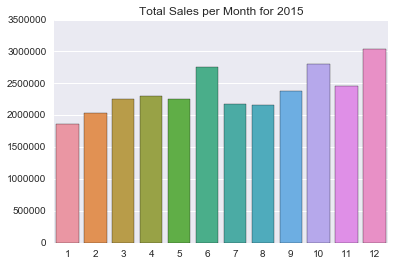

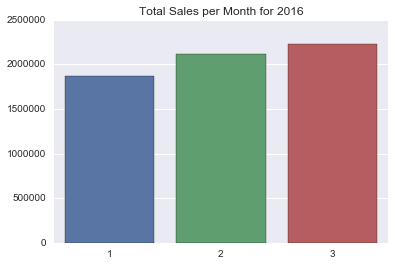

In [10]:
##2015 data
dff15 = df[df["year"]==2015]
months15 = np.sort(dff15["month"].unique()).tolist()

dff15 = dff15.groupby(["month"]).sales.sum().tolist()

sns.plt.title('Total Sales per Month for 2015')
sns.barplot(x=months15,y=dff15)
plt.show()

##2016 data
dff16 = df[df["year"]==2016]
months16 = np.sort(dff16["month"].unique()).tolist()

dff16 = dff16.groupby(["month"]).sales.sum().tolist()

sns.plt.title('Total Sales per Month for 2016')
sns.barplot(x=months16,y=dff16)
plt.show()

In [11]:
df15 = df[df["year"]==2015]
df16 = df[df["year"]==2016]

In [123]:
dfs = df15.groupby(["store", "month"]).sales.sum()

df1 = pd.DataFrame(dfs)
df1 = df1.unstack(level=-1)
#volume sold
dfv1 = pd.DataFrame(df15.groupby("store").volume_sold.sum())
#total sales per store
dft1 = pd.DataFrame(df15.groupby("store").sales.sum())
#total number of bottles sold
dfb1 = pd.DataFrame(df15.groupby("store").bottles_sold.mean())

#concatenate
agg_df = pd.concat([df1,dfv1,dft1,dfb1], axis=1)
agg_df.fillna(value=0, inplace=True)

In [125]:
filcols = ["jan", "feb", "mar","apr","may","jun","jul","aug","sep","oct","nov","dec", "vol_sold", "total", "bottles_sold"]

agg_df.columns = filcols

In [126]:
agg_df["store"] = agg_df.index

In [193]:
agg_df["first"] = agg_df.jan + agg_df.feb + agg_df.mar
agg_df["sec"] = agg_df.apr + agg_df.may + agg_df.jun
agg_df["third"] = agg_df.jul + agg_df.aug + agg_df.sep
agg_df["fourth"] = agg_df["oct"] + agg_df.nov + agg_df.dec

print type(agg_df["first"])
#agg_df["all_qtr"] = agg_df.first + agg_df.sec + agg_df.third + agg_df.fourth

<class 'pandas.core.series.Series'>


## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

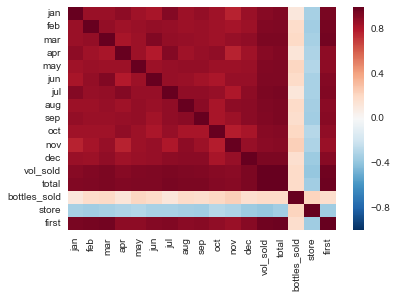

In [182]:
sns.heatmap(agg_df.corr())

In [129]:
dfdummies = pd.get_dummies(df["county"])
storesdf = pd.concat([df["store"], dfdummies], axis=1)

#we might need this
dummies = dfdummies.columns.tolist()

,store,Adair,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,3717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
storesdf.drop("Polk", axis=1, inplace=True)

In [131]:
combined = pd.merge(storesdf, agg_df, how='inner', on=["store"])
combined.drop_duplicates(inplace=True)

(1372, 115)

In [132]:
dfsm = df16.groupby(["store", "month"]).sales.sum()

df2 = pd.DataFrame(dfsm)
df2 = df2.unstack(level=-1)

#volume sold
dfv2 = pd.DataFrame(df16.groupby("store").volume_sold.mean())
#total sales per store
dft2 = pd.DataFrame(df16.groupby("store").sales.sum())
#total number of bottles sold
dfb2 = pd.DataFrame(df16.groupby("store").bottles_sold.mean())

#concatenate
agg_df2 = pd.concat([df2,dfv2,dft2,dfb2], axis=1)
agg_df2.fillna(value=0, inplace=True)

filcols2 = ["jan", "feb", "mar","vol_sold", "total", "bottles_sold"]

agg_df2.columns = filcols2

agg_df2["store"] = agg_df2.index
agg_df2["first"] = agg_df2.jan + agg_df2.feb + agg_df2.mar

combined_2 = pd.merge(storesdf, agg_df2, how='inner', on=["store"])
combined_2.drop_duplicates(inplace=True)

(1280, 106)

In [133]:
#one df with our whole dataset with the same features
dfs3 = df.groupby(["store", "month"]).sales.sum()
df3 = pd.DataFrame(dfs3)
df3 = df3.unstack(level=-1)
#volume sold
dfv3 = pd.DataFrame(df.groupby("store").volume_sold.mean())
#total sales per store
dft3 = pd.DataFrame(df.groupby("store").sales.sum())
#total number of bottles sold
dfb3 = pd.DataFrame(df.groupby("store").bottles_sold.mean())

#concatenate
agg_df3 = pd.concat([df3,dfv3,dft3,dfb3], axis=1)
agg_df3.fillna(value=0, inplace=True)

agg_df3.columns = filcols
agg_df3["store"] = agg_df3.index
agg_df3["first"] = agg_df3.jan + agg_df3.feb + agg_df3.mar

combined_3 = pd.merge(storesdf, agg_df3, how='inner', on=["store"])
combined_3.drop_duplicates(inplace=True)

(1378, 115)

In [134]:
months = ["jan", "feb", "mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]

combined_2.drop(months[0:3],axis=1, inplace=True)
combined.drop(months,axis=1, inplace=True)
combined_3.drop(months,axis=1, inplace=True)

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [136]:
from sklearn import datasets, linear_model,preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, r2_score, mean_squared_error
from itertools import combinations
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import LassoCV

In [137]:
def runLinear():
    scores = {}
    xs = preprocessing.scale(xs)
    ys = preprocessing.scale(ys)
    
    X_test = preprocessing.scale(X_test)
    y_test = preprocessing.scale(y_test)
    
    lr = linear_model.LinearRegression()
    model = lr.fit(xs, ys)
    predictions = model.predict(X_test)

    lin = [np.sqrt(mean_squared_error(y_test, predictions)), r2_score(y_test, predictions)]
    scores["linear"] = lin

    ridgeregcv = linear_model.RidgeCV(alphas=[0.1, 1, .001, .01, 10]) # Try different alphas
    model = ridgeregcv.fit(xs, ys)
    predictions = ridgeregcv.predict(X_test)
    ridge = [np.sqrt(mean_squared_error(y_test, predictions)), r2_score(y_test, predictions)]
    scores["ridge"] = ridge

    
    lassoregcv = linear_model.LassoCV(alphas=[0.1, 1, .001, .01, 10])
    lassoregcv.fit(xs, ys)
    predictions = lassoregcv.predict(X_test)
    lasso = [np.sqrt(mean_squared_error(y_test, predictions)), r2_score(y_test, predictions)]
    scores["lasso"] = lasso
    
    return scores

In [138]:
all_columns = "" + "," .join(combined.columns - ["total"]) + ""
notsold_cols ="" + "," .join(combined.columns - ["total","bottles_sold","vol_sold"]) + ""
wostore_cols ="" + "," .join(combined.columns - ["total","bottles_sold","vol_sold","store"]) + ""

all_columns = all_columns.split(",")
notsold_cols = notsold_cols.split(",")
wostore_cols = wostore_cols.split(",")

/Users/Sheena/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':
/Users/Sheena/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app
/Users/Sheena/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [139]:
#for all columns

xs = combined[all_columns]
ys = combined["total"]

X_test = combined_2[all_columns]
y_test = combined_2["total"]

#returns {model: [rmse, r2]}
scores = runLinear()
print scores

{'ridge': [0.85008500498144512, 0.27735548430569668], 'linear': [0.85080851428309279, 0.27612487202339664], 'lasso': [0.84729015289062615, 0.28209939681457952]}


In [140]:
#without bottles sold and bottles volume
xs = combined[notsold_cols]
ys = combined["total"]

X_test = combined_2[notsold_cols]
y_test = combined_2["total"]

scores = runLinear()
print scores

{'ridge': [0.047587002461048349, 0.99773547719677214], 'linear': [0.047586700694134024, 0.99773550591704685], 'lasso': [0.042281647589778919, 0.9982122622770937]}


In [141]:
#without bottles sold and bottles volume and store
xs = combined[wostore_cols]
ys = combined["total"]

X_test = combined_2[wostore_cols]
y_test = combined_2["total"]

scores = runLinear()
print scores

{'ridge': [0.047554223853431277, 0.99773859579369772], 'linear': [0.047553932702080741, 0.99773862348456599], 'lasso': [0.042259271583170117, 0.99821415396525992]}


In [142]:
#just the first qtr total sales and the store
xs = combined[["first","store"]]
ys = combined["total"]

X_test = combined_2[["first","store"]]
y_test = combined_2["total"]

scores = runLinear()
print scores

{'ridge': [0.022127631306819943, 0.99951036793274939], 'linear': [0.022126892538445915, 0.99951040062659202], 'lasso': [0.023046362401707481, 0.99946886518004918]}


In [143]:
#just store and the county
stdum = filter(lambda x: x!="Polk", dummies)
stdum.append("store")

xs = combined[stdum]
ys = combined["total"]

X_test = combined_2[stdum]
y_test = combined_2["total"]

scores = runLinear()
print scores

{'ridge': [0.92706420298226155, 0.14055196354886446], 'linear': [0.92706422334796446, 0.14055192578823583], 'lasso': [0.93338461910957637, 0.1287931528096713]}


In [175]:
#now that we found the "right" features, let's try gridsearch to see what parameters to use for our whole dataset
X = combined_3[wostore_cols]
y = combined_3["total"]

X = preprocessing.scale(X)
y = preprocessing.scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = linear_model.LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,parameters)
gridmod = grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

print "r2: %s" %grid.best_score_
print "rmse : %s" % np.sqrt(mean_squared_error(y_test, predictions))


r2: -6.80918188055e+22
rmse : 0.208545338452


In [176]:
ridgeregcv = linear_model.RidgeCV(alphas=[0.1, 1, .001, .01, 10]) # Try different alphas
model = ridgeregcv.fit(X_train, y_train)
predictions = ridgeregcv.predict(X_test)

print "RMSE: %s" %np.sqrt(mean_squared_error(y_test, predictions))
print "r2: %s" %r2_score(y_test, predictions)

RMSE: 0.158806577293
r2: 0.943623190362


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [177]:
X = combined_3[wostore_cols]
y = combined_3["total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = linear_model.LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,parameters)
gridmod = grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

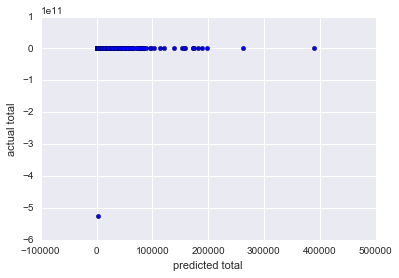

In [178]:
plt.scatter(y_test, predictions)
plt.ylabel("actual total")
plt.xlabel("predicted total")

In [179]:
ridgeregcv = linear_model.RidgeCV(alphas=[0.1, 1, .001, .01, 10]) # Try different alphas
model = ridgeregcv.fit(X_train, y_train)
predictions = ridgeregcv.predict(X_test)

print "RMSE: %s" %np.sqrt(mean_squared_error(y_test, predictions))
print "r2: %s" %r2_score(y_test, predictions)

RMSE: 9711.05747829
r2: 0.944625974957


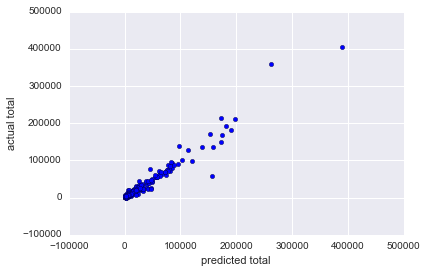

In [180]:
plt.scatter(y_test, predictions)
plt.ylabel("actual total")
plt.xlabel("predicted total")

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [181]:
#####the model that had the best linear score without regularization before testing on whole data####
X = combined_3[wostore_cols]
y = combined_3["total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = linear_model.LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,parameters)
gridmod = grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

print "r2: %s" %grid.best_score_
print "rmse : %s" % np.sqrt(mean_squared_error(y_test, predictions))


####The model with the best score overall########

ridgeregcv = linear_model.RidgeCV(alphas=[0.1, 1, .001, .01, 10]) # Try different alphas
model = ridgeregcv.fit(X_train, y_train)
predictions = ridgeregcv.predict(X_test)

print "RMSE: %s" %np.sqrt(mean_squared_error(y_test, predictions))
print "r2: %s" %r2_score(y_test, predictions)




r2: 0.982310914375
rmse : 28299556764.0
RMSE: 9711.05747829
r2: 0.944625974957
